# Punto 1

Sabemos que la ecuación diferencial que rige el movimiento de un resorte está dada por

$$F=-kx$$

donde $k$ es la constante de elasticidad del resorte, en este caso, es $k=1 N/m$

Veamos que $$F=ma=m\frac{dx}{dt}$$:

Entonces tendríamos que resolver la siguiente ecuación diferencial:

$$m\frac{dx}{dt}=-kx$$

$$\frac{dx}{dt}=-\frac{k}{m}x$$

Para resolver esta ecuación diferencial con métodos numéricos, usamos el método de éuler, que está en scipy como "scipy.integrate.odeint"

In [1]:
##Importamos librerías
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

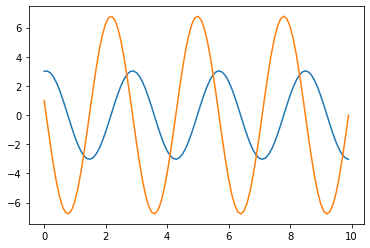

In [30]:
##Creemos la función modelo para usar odeint
k=1
m=0.2
def modelo(U,t):
    x,dx=U
    return([dx,(-k/m)*x])
##Ahora, con odeint resolvamos la ecuación diferencial numéricamente:
U0=[3,1]
t=np.arange(0,10,0.1)
y=spi.odeint(modelo,U0,t)
plt.plot(t,y)

Vemos que la función en efecto nos retornó una función armónica para la posición y para la velocidad.

Ahora con la función numpy.random, creemos muchas condiciones iniciales para visualizar cómo sería el espacio de fase de nuestro sistema

Text(0, 0.5, 'v(t)')

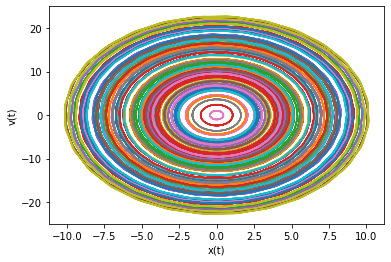

In [27]:

for i in range(100):
    u01=np.random.uniform(-10,10)
    u02=np.random.uniform(-10,10)
    U0=[u01,u02]
    y=spi.odeint(modelo,U0,t)
    plt.plot(y[:,0],y[:,1])
plt.xlabel("x(t)")
plt.ylabel("v(t)")

# Punto 2
Importemos con pandas los datos del decaimiento con respecto a los años de los núcleos en una muestra de strontium

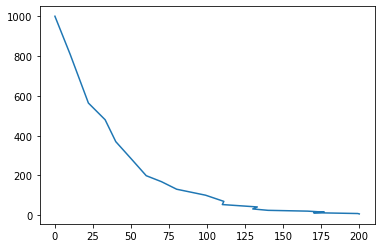

In [35]:
import pandas as pd
url = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json'
df= pd.read_json(url)
df
plt.plot(df["t"],df["N(t)"])

Para hacer un ajuste, podemos usar la función curve_fit de scipy que nos permite hallar una curva que se acerque a los puntos dados con la función de nuestro gusto. En este caso, sabemos que nuestra función es de la forma:
$$f(t)=N_0e^{\lambda t}$$, 
donde lambda es $$\lambda=\frac{ln(2)}{\tau}$$

Entonces nos quedaría:

$$f(t)=N_0e^{-\frac{ln(2)}{\tau}t}$$

$$f(t)=N_02^{-\frac{t}{\tau}t}$$

Con la función curve_fit de scipy.optimize podemos crear una función del estilo:

$$f(t)=a2^{-\frac{-t}{b}}+c$$
Y esta, dandole los datos, nos daría los valores de a,b,c para que la función ajuste la curva a nuestros datos

In [67]:
import scipy.optimize as spo
fit=lambda t,a,b,d: a*2**(-t/b)+d
t=np.arange(0,200,0.1)
x=spo.curve_fit(fit,df["t"],df["N(t)"])[0] ##x es el arreglo con nuestros valores a,b,c
err=spo.curve_fit(fit,df["t"],df["N(t)"])[1] 
x
error=np.sqrt(np.diag(err))

Ahora, con los valores de a,b y c, creemos nuestra función:

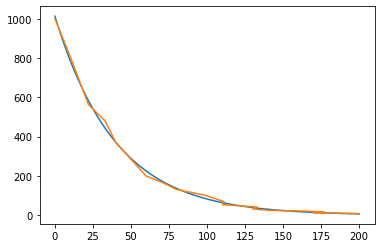

In [66]:
fitt=lambda t: x[0]*2**(-t/x[1])+x[2]
plt.plot(t,fitt(t))
plt.plot(df["t"],df["N(t)"])

Vemos que nuestra función se aproxima muy bien. Entonces, significa que los valores de a,b y c son bien escogidos por nuestro método de curve_fit.

El valor de vida media para nuestro caso sería el valor de nuestro b. Y además, su error, también nos lo da la función curve fit

In [68]:
print("El valor de vida media es",x[1],"+-",error[1])

El valor de vida media es 27.64359222923699 +- 0.757611276188353
